In [119]:
#detach("package:elasdics2d", unload=TRUE)
devtools::install("../../elasdics")
library(elasdics2d)
library(ggplot2)
library(gridExtra)
library(dplyr)

# Display plots in smaller size
options(repr.plot.width=10, repr.plot.height=6)


✔  checking for file ‘/home/mnl/Dropbox/Statistik/elasdics/DESCRIPTION’
─  preparing ‘elasdics2d’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘elasdics2d_0.1.0.tar.gz’
   
Running /usr/lib64/R/bin/R CMD INSTALL \
  /tmp/RtmpqkBORR/elasdics2d_0.1.0.tar.gz --install-tests 
* installing to library ‘/home/mnl/R/x86_64-pc-linux-gnu-library/4.0’
* installing *source* package ‘elasdics2d’ ...
** using staged installation
** R
** tests
** byte-compile and prepare package for lazy loading
No man pages found in package  ‘elasdics2d’ 
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (elasdics2d)



Attaching package: ‘elasdics2d’


The following object is masked _by_ ‘.GlobalEnv’:

    center_curve




In [2]:
source("../scripts/load_datasets.R")

set.seed(18)

data_curves <- curves.spiral(n_curves=10, rotate=FALSE, scale=FALSE, center=FALSE)
data_curves2 <- curves.digit3(rotate=TRUE, scale=TRUE, center=FALSE)

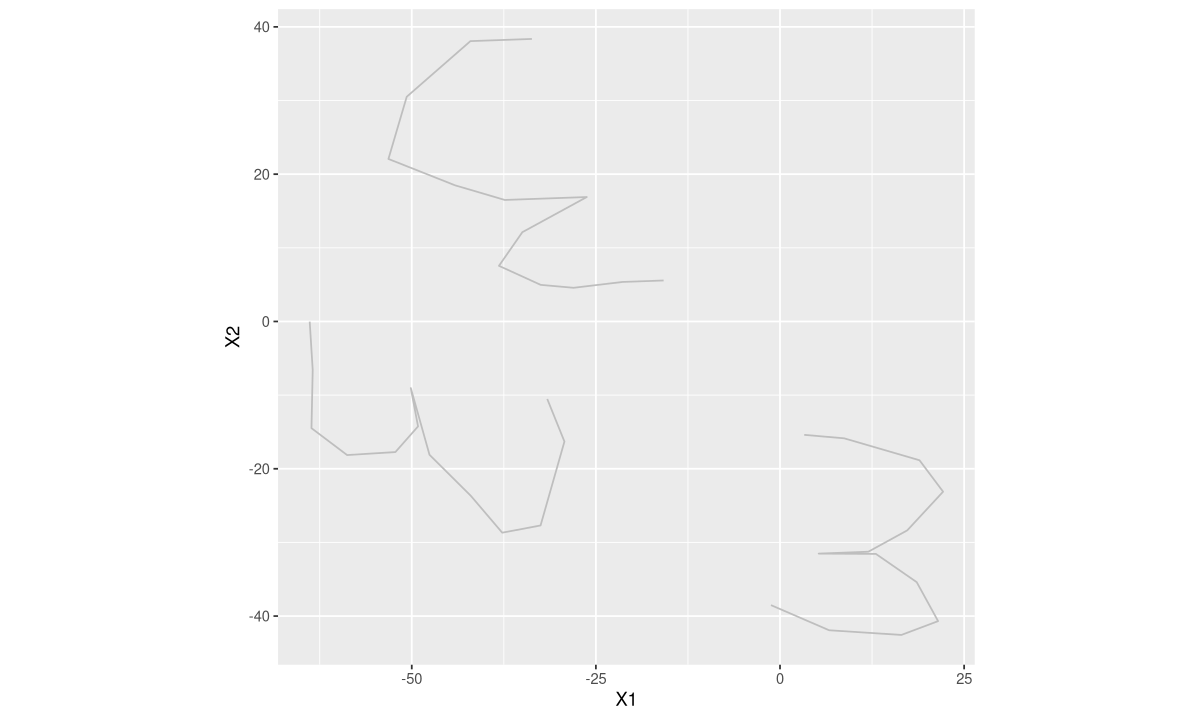

In [3]:
cids = c(2, 4, 13)
ggplot(bind_rows(data_curves2[cids], .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    coord_fixed()

ggsave("../presentation/images/motivation_data.png", dpi=300, scale=0.6, width=4.5, height=4)

### Warping alignment

In [4]:
normalize_curve <- function(curve) {
    dx = diff(curve$X1)
    dy = diff(curve$X2)
    l = sum(sqrt(dx^2 + dy^2))
    curve$X1 = curve$X1 / l
    curve$X2 = curve$X2 / l
    curve
}

data_curves <- lapply(data_curves, normalize_curve)
data_curves2 <- lapply(data_curves2, normalize_curve)

In [5]:
# Comput mean 'digits3'
type = "smooth"
knots <- seq(0,1, length = 11)
mean <- compute_elastic_mean(data_curves2, knots = knots, type = type, proc2d = TRUE, penalty = 0)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”


### Motivation

In [8]:
theta <- 0
mat <- matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), nrow = 2, ncol = 2)
mean.rot <- as.matrix(get_evals(mean)) %*% t(mat)
mean.rot <- as.data.frame(mean.rot)
colnames(mean.rot) <- c("X1", "X2")

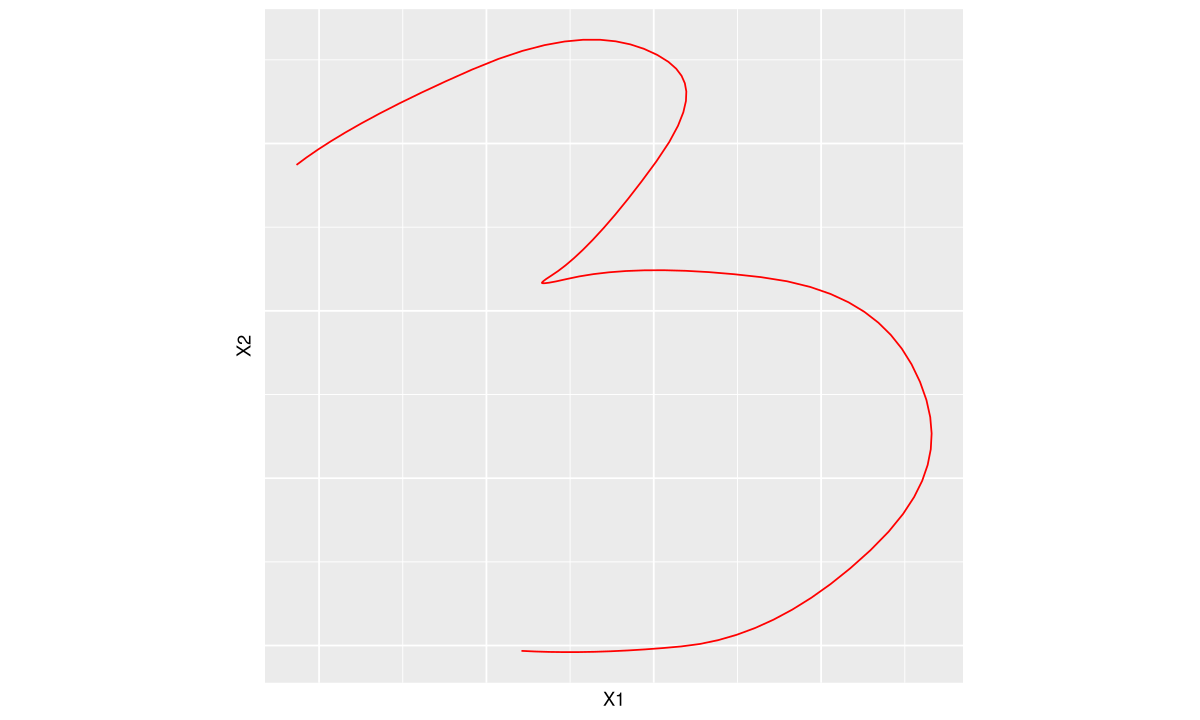

In [9]:
ggplot(mean.rot, aes(x=X1, y=X2)) + 
    geom_path(size=0.5, color="red") +
    coord_fixed() + 
   theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

ggsave("../presentation/images/motivation_mean.png", dpi=300, scale=0.6, width=4.5, height=4)

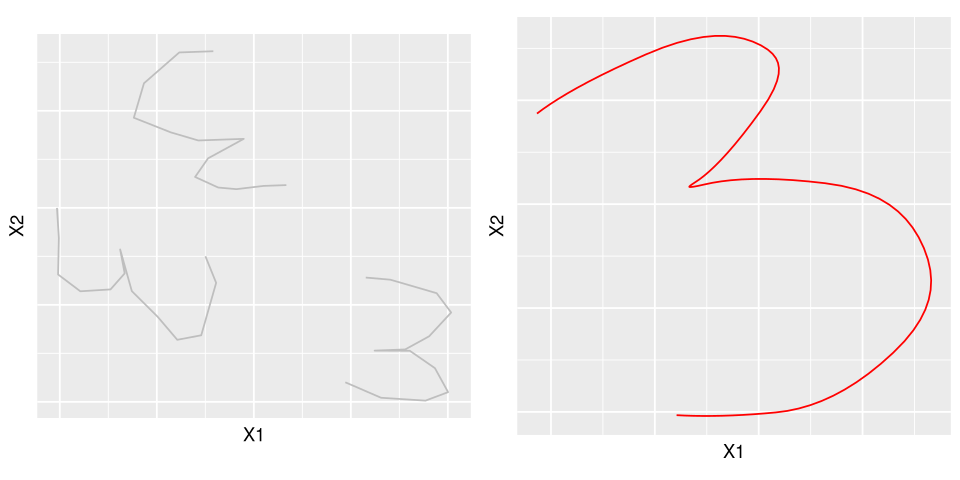

In [162]:
options(repr.plot.width=8, repr.plot.height=4)

cids = c(2, 4, 13)
p1 <- ggplot(bind_rows(data_curves2[cids], .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    coord_fixed() + 
   theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

p2 <- ggplot(mean.rot, aes(x=X1, y=X2)) + 
    geom_path(size=0.5, color="red") +
    coord_fixed() + 
   theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

grid.arrange(p1, p2, ncol=2)
ggsave("../presentation/images/motivation.png", arrangeGrob(p1, p2,ncol=2), dpi=300, scale=0.6, width=8.5, height=4)

### Data Plots

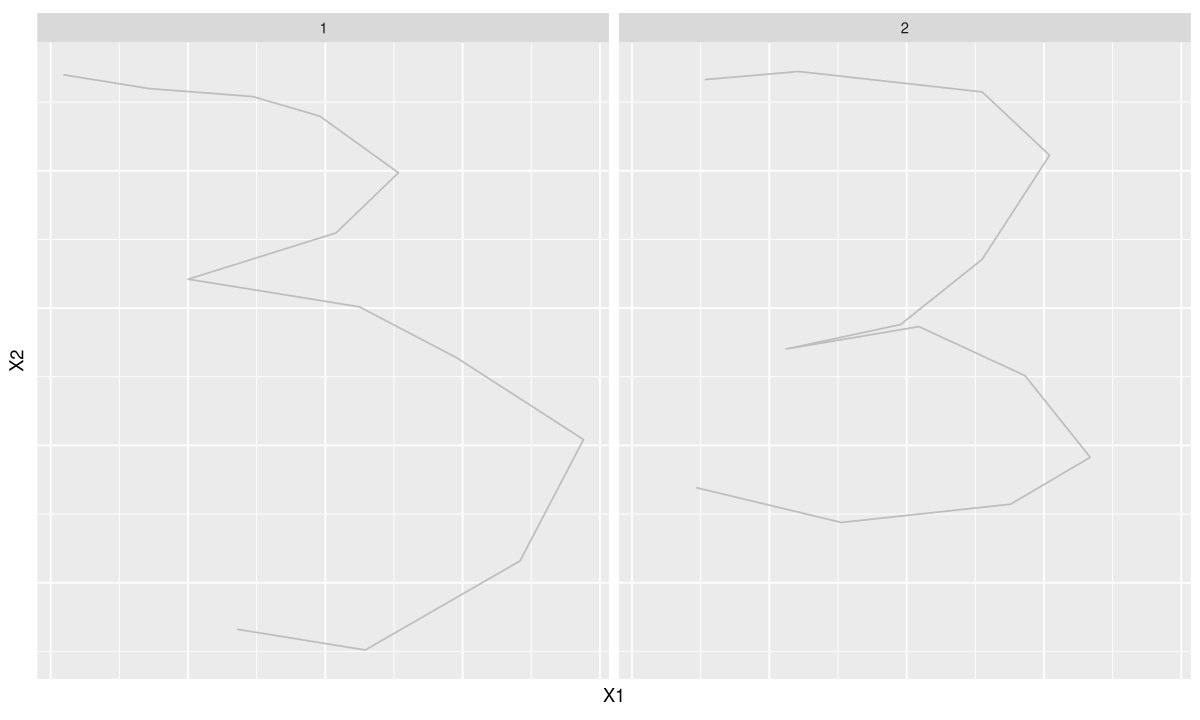

In [188]:
options(repr.plot.width=10, repr.plot.height=6)
pfits <- lapply(seq_along(data_curves2), function(j){
    curve <- get_proc2d_from_param(
        data_curves2[[j]],
        mean$G_optims[[j]]-0.1*pi,
        mean$b_optims[[j]]
    )
    curve <- center_curve(curve)
    curve$t <- elasdics:::get_arc_length_param(curve)
    curve
})

cids = c(4,13)
ggplot(bind_rows(pfits[cids], .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    coord_fixed() + 
   theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank()) +
    facet_wrap(~id)

#ggsave("../presentation/images/digits3.png", dpi=300, scale=0.65, width=5, height=4)

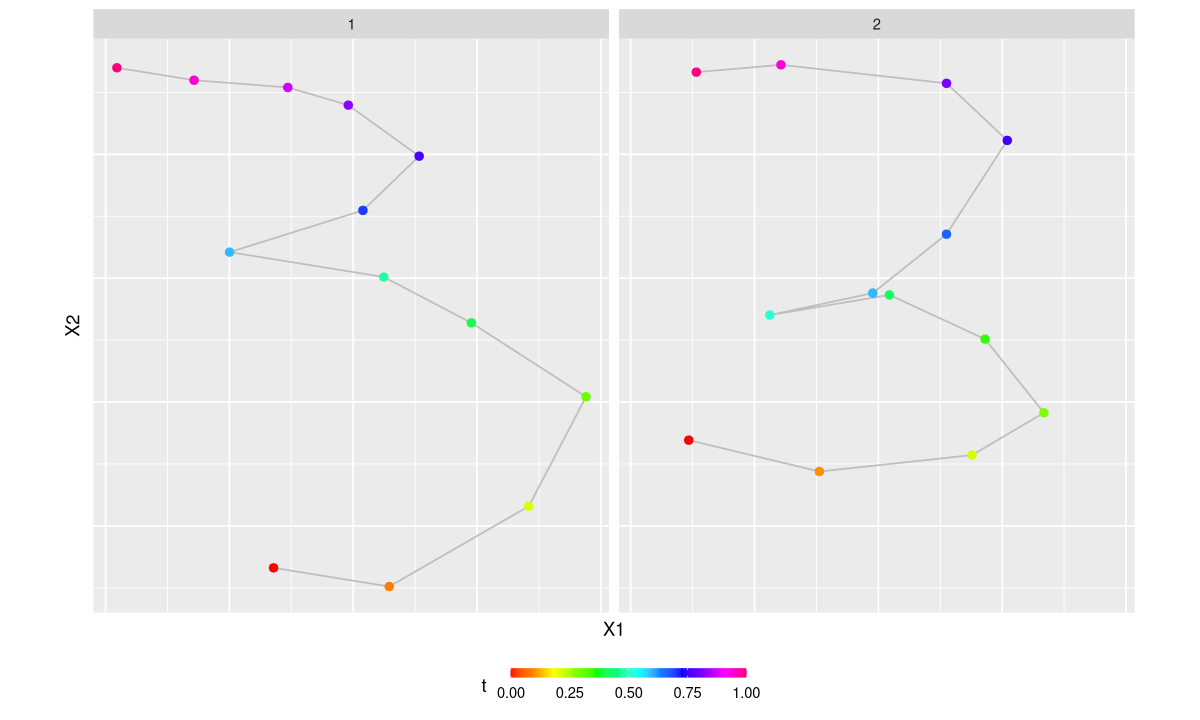

In [190]:
ggplot(bind_rows(pfits[cids], .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    geom_point(size=2, aes(x=X1, y=X2, group=id, col=t)) +
    scale_color_gradientn(colours = rainbow(12), name="t   ") +  
    coord_fixed() + 
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank()) +
    theme(legend.position="bottom",
          legend.key.size = unit(0.2, "cm"),
          legend.key.width = unit(1,"cm")) +
    guides(color_gradientn = guide_legend(override.aes = list(size = 0.5))) +
    facet_wrap(~id)
          
ggsave("../presentation/images/digits3_arcl.png", dpi=300, scale=0.7, width=4.5, height=3.5)

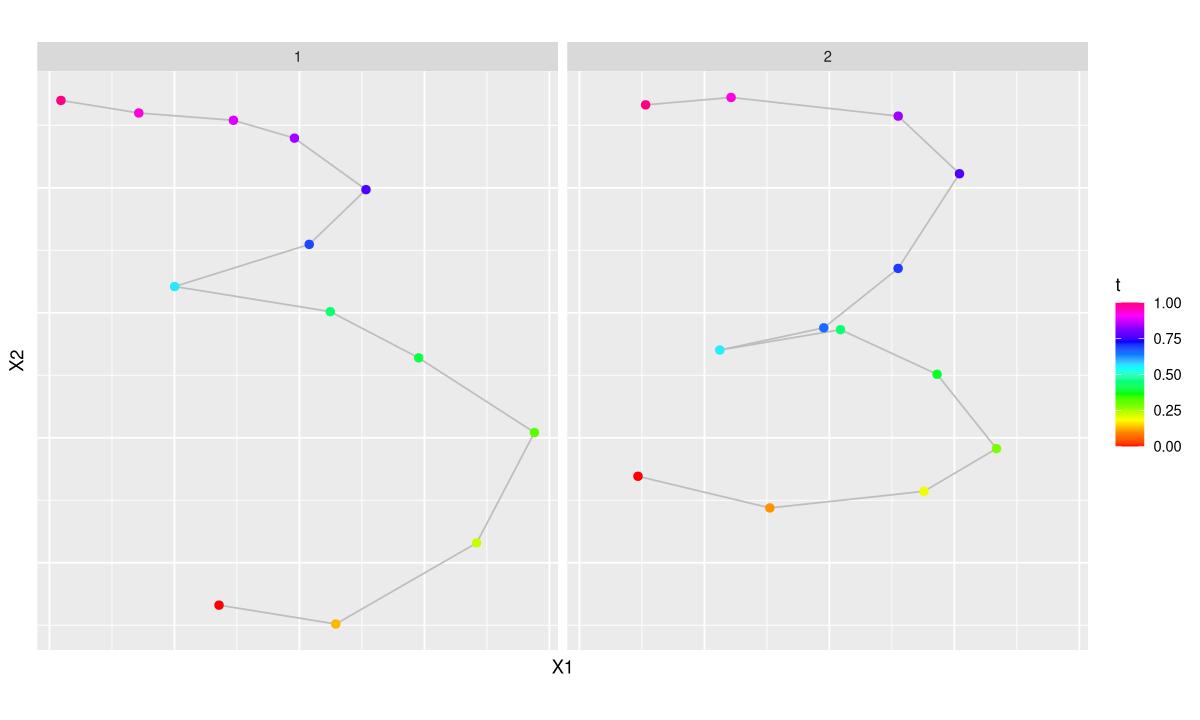

In [196]:
pfits_warped <- lapply(seq_along(data_curves2), function(j){
    curve <- get_proc2d_from_param(
        data_curves2[[j]],
        mean$G_optims[[j]]-0.1*pi,
        mean$b_optims[[j]]
    )
    curve <- center_curve(curve)
    curve$t <- mean$data_curves[[j]]$t_optim
    curve
})
ggplot(bind_rows(pfits_warped[cids], .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    geom_point(size=2, aes(x=X1, y=X2, group=id, col=t)) +
    scale_color_gradientn(colours = rainbow(12)) +  
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank()) +
    facet_wrap(~id)
ggsave("../presentation/images/digits3_warp.png", dpi=300, scale=1, width=6, height=3.5)

### SRV Data Curves

In [149]:
srvs <- lapply(pfits, function(pfit){elasdics:::get_srv_from_points(pfit)})
pfits_for_srv <- lapply(pfits, function(pfit){
    data.frame("t" = get_arc_length_param(pfit), pfit)
})

In [155]:
minx <- min(srvs[[4]]$X1)
maxx <- max(srvs[[4]]$X1)
miny <- min(srvs[[4]]$X2)
maxy <- max(srvs[[4]]$X2)

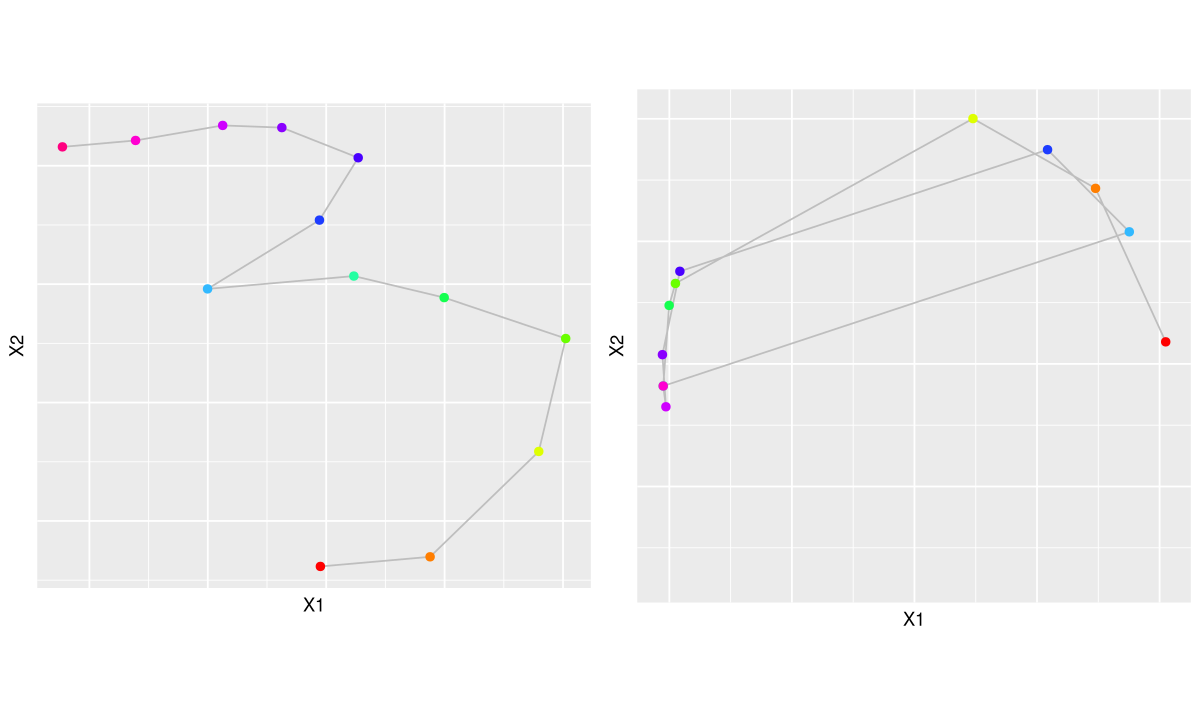

In [161]:
p1 <- ggplot(pfits_for_srv[[4]], aes(x=X1, y=X2)) + 
    geom_path(size=0.5,color="grey") +
    geom_point(size=2, aes(x=X1, y=X2, col=t), show.legend=FALSE) +
    scale_color_gradientn(colours = rainbow(12)) +  
    coord_fixed() + 
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank()) +
    guides(color_gradientn = guide_legend(override.aes = list(size = 0.5)))

p2 <- ggplot(srvs[[4]], aes(x=X1, y=X2)) + 
    geom_path(size=0.5, color="grey") +
    geom_point(size=2, aes(x=X1, y=X2, col=t), show.legend=FALSE) +
    scale_color_gradientn(colours = rainbow(12), limits=c(0,1)) +  
    coord_fixed() +
    xlim(c(minx,maxx)) + ylim(c(minx+0.15,maxx)) +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank()) +
    guides(color_gradientn = guide_legend(override.aes = list(size = 0.5)))


grid.arrange(p1, p2, ncol=2)

ggsave("../presentation/images/digits3_srv.png", arrangeGrob(p1, p2,ncol=2), dpi=300, scale=1, width=6, height=3.5)

### Procrustes Mean and Fits

### Normalization Test

In [107]:
normalize_curve <- function(curve) {
    t <- get_arc_length_param(curve)
    dx = diff(curve$X1)
    dy = diff(curve$X2)
    dt = diff(t)
    l = sum(sqrt((dx^2 + dy^2))
    curve$X1 = curve$X1 / l
    curve$X2 = curve$X2 / l
    curve
}


ERROR: Error in parse(text = x, srcfile = src): <text>:7:5: unexpected symbol
6:     l = sum(sqrt((dx^2 + dy^2))
7:     curve
       ^


In [109]:
curve <- function(t){
      rbind(t*cos(13*t), t*sin(13*t))
    }
    
# Transform to data curves format.
nobs <- list(11,101,131)
test.spirals <- lapply(nobs, function(m){
  t <- seq(0,1,length=m)
  if(m<=101){
    data.frame(t(curve(t)))
  } else {
    data.frame(t(curve(t) + 0.06*t*rnorm(2*length(t))))
  }
})
test.spirals.norm <- lapply(test.spirals, function(curve){
    normalize_curve(curve)
})

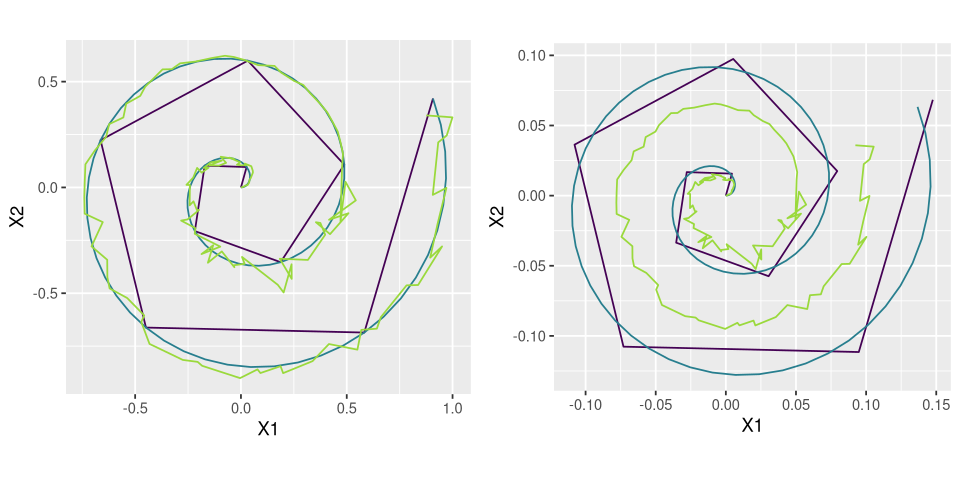

In [110]:
library(viridis)
options(repr.plot.width=8, repr.plot.height=4)
p1 <- ggplot(bind_rows(test.spirals, .id = "id"), aes(x=X1, y=X2, group = id)) + 
    geom_path(size=0.5, aes(color=id)) +
    guides(color=FALSE) +
    scale_color_viridis_d(end=0.85) + 
    coord_fixed()

p2 <- ggplot(bind_rows(test.spirals.norm, .id = "id"), aes(x=X1, y=X2, group = id)) + 
    geom_path(size=0.5, aes(color=id)) +
    guides(color=FALSE) +
    scale_color_viridis_d(end=0.85) + 
    coord_fixed()

grid.arrange(p1, p2, ncol=2)
ggsave("../presentation/images/normalization.png", arrangeGrob(p1, p2,ncol=2), dpi=300, scale=0.8, width=6, height=3)

### Mean no Warping

In [19]:
# Comput mean 'digits3'
knots <- seq(0,1, length = 11)
mean1 <- compute_elastic_mean(data_curves2, knots = knots, type = "polygon", proc2d = TRUE, penalty = 0, max_iter=0)
mean2 <- compute_elastic_mean(data_curves2, knots = knots, type = "smooth", proc2d = TRUE, penalty = 0, max_iter=0)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”


In [12]:
plot_cov_surface<- function(cov_fit, h=0.01, filename = ""){
  if(filename != ""){
      png(filename = filename, res=300, width = 6, height = 3, units = "in", pointsize = 10)
  }
  # Define covariance surface grid (s,t).
  arg.grid = seq(0, 1, by=h)
  cov.grid = expand.grid(t = arg.grid, s = arg.grid)
  # Evaluate fit on grid.
  cov.re = predict(cov_fit$re, newdata = cov.grid)
  cov.im = predict(cov_fit$im, newdata = cov.grid)
  
  zlim = c(min(c(min(cov.re),min(cov.im))),max(c(max(cov.re),max(cov.im))))
  zlim = c(-max(abs(zlim)),max(abs(zlim)))

  par(mfrow=c(1,2), mar=c(0,0,0,2), oma=c(0.45,0.45,0.45,0.45))
  # From 'fdapace/src/R/CreateCovPlot.R'
  args1 <- list(
    xlab='t', ylab='s', zlab = 'C(s,t)', xlim = c(0,1), ylim=c(0,1), zlim = zlim
  )
  args2 = list (x = arg.grid, y = arg.grid, z = matrix(cov.re, nrow=101))
  do.call(plot3D::persp3D, c(args2, args1))

  # From 'fdapace/src/R/CreateCovPlot.R'
  args1 <- list(
    xlab='t', ylab='s', zlab = 'C(s,t)', zlim = zlim
  )
  args2 = list (x = arg.grid, y = arg.grid, z = matrix(cov.im,nrow=101))
  do.call(plot3D::persp3D, c(args2, args1))
  if(filename != ""){
      dev.off()
  }
}

In [665]:
options(repr.plot.width=11, repr.plot.height=7)
plot_cov_surface(mean1$cov_fit, filename="../presentation/images/cov_surface_poly.png")
plot_cov_surface(mean2$cov_fit, filename="../presentation/images/cov_surface_smooth.png")

png 
  2

png 
  2

In [44]:
pfits <- mean2$pfits
pfits_norm <- lapply(mean2$pfits, normalize_curve)

In [45]:
mean2_elastic <- compute_elastic_mean(pfits, knots, type="smooth", max_iter=0)

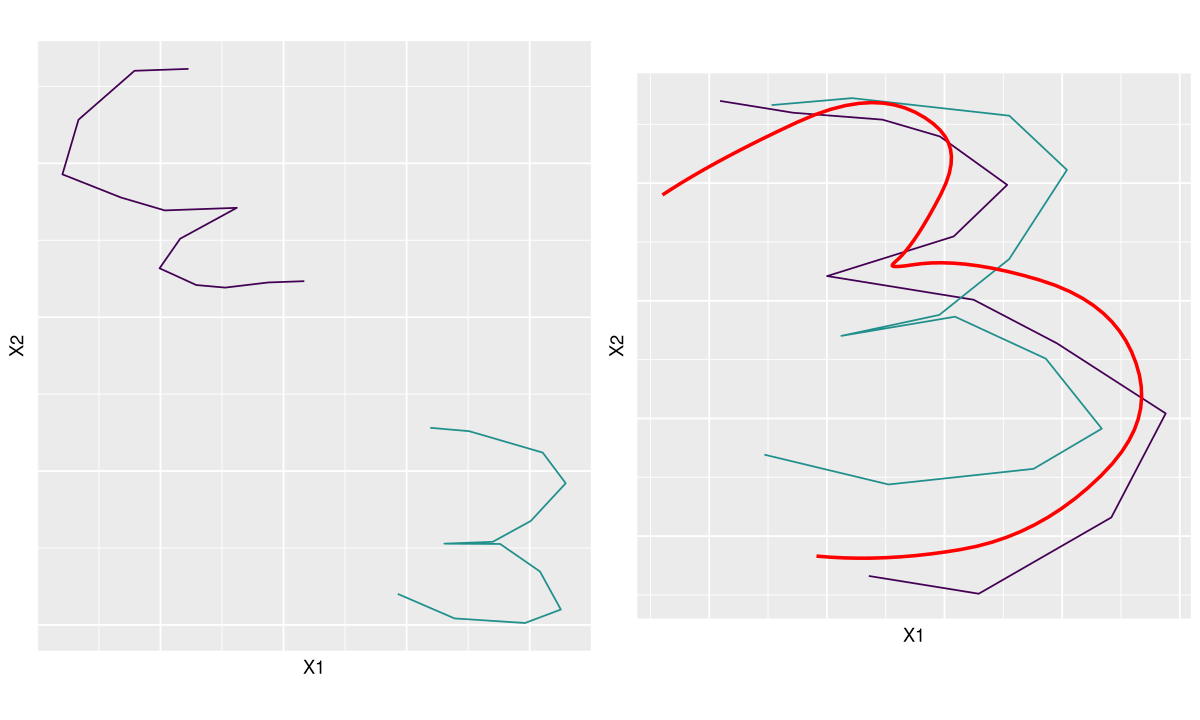

In [212]:
cids = c(2, 4, 13)

p1 <- ggplot(bind_rows(data_curves2[cids][-1], .id = "id"), aes(x=X1, y=X2)) +
    geom_path(aes(group=id, color=id), size=0.5,show.legend=FALSE) +
    coord_fixed() + 
    guides(color=FALSE) +
    scale_color_viridis_d(end=0.5) + 
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

p2 <- ggplot(bind_rows(pfits[cids][-1], .id = "id"), aes(x=X1, y=X2)) +
    geom_path(aes(group=id, color=id), size=0.5, show.legend=FALSE) +
    geom_path(data=get_evals(mean2), aes(x=X1, y=X2), size=1, color="red") +
    guides(color=FALSE) +
    scale_color_viridis_d(end=0.5) + 
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())


grid.arrange(p1, p2, ncol=2)
#ggsave("../presentation/images/pfit_mean_digits3.png", arrangeGrob(p1, p2,ncol=2), dpi=300, scale=0.6, width=8.5, height=4)

### spirals and digits3 results

In [120]:
source("../scripts/load_datasets.R")

set.seed(18)
data.spirals <- curves.spiral(n_curves=10, rotate=TRUE, scale=TRUE, center=TRUE)
data.digits3 <- curves.digit3(rotate=TRUE, scale=TRUE, center=TRUE)
data.spirals <- lapply(data.spirals, normalize_curve)
data.digits3 <- lapply(data.digits3, normalize_curve)

In [121]:
# Comput mean 'digits3'
knots1 <- seq(0,1, length = 19)
mean.spirals <- compute_elastic_mean(data.spirals, knots = knots1, type = "polygon", proc2d = TRUE, penalty = 0)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

In [122]:
knots2 <- seq(0,1, length = 11)
mean.digits3 <- compute_elastic_mean(data.digits3, knots = knots2, type = "smooth", proc2d = TRUE, penalty = 0)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”


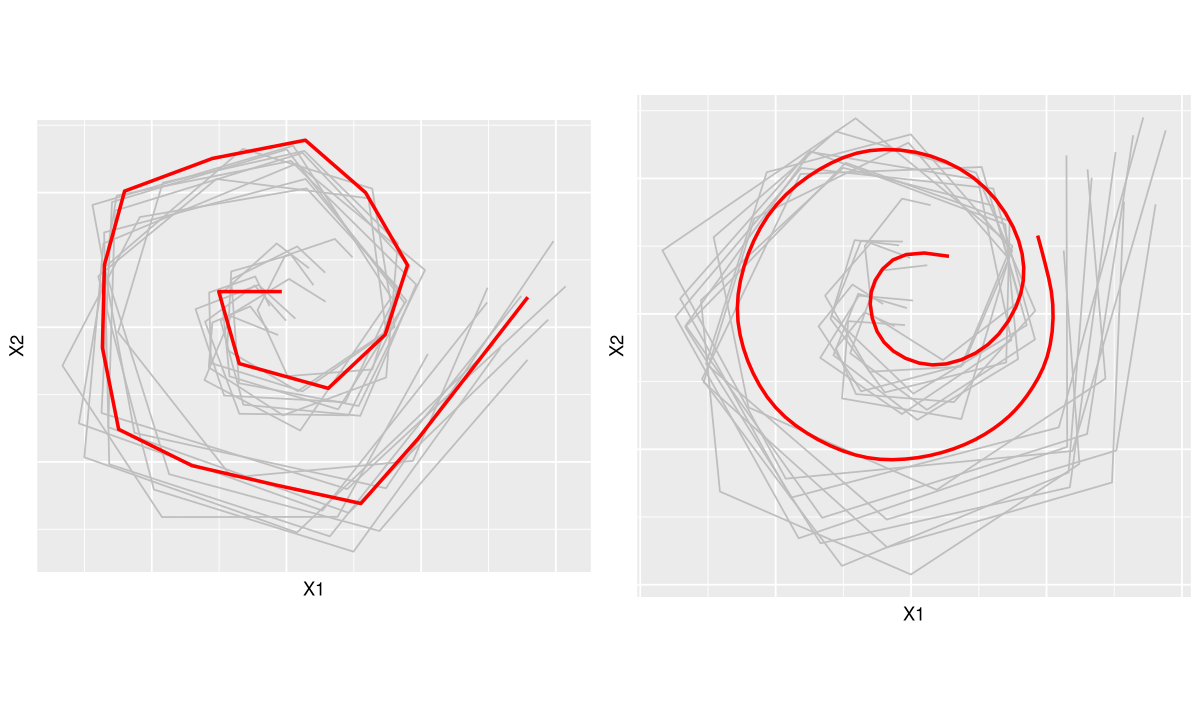

In [198]:
p1 <- ggplot(bind_rows(mean.spirals$pfits, .id = "id"), aes(x=X1, y=X2)) +
    geom_path(aes(group=id), size=0.5, color="grey", show.legend=FALSE) +
    geom_path(data=get_evals(mean.spirals), aes(x=X1, y=X2), size=1, color="red") +
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

p2 <- ggplot(bind_rows(mean.spirals.smooth$pfits, .id = "id"), aes(x=X1, y=X2)) +
    geom_path(aes(group=id), size=0.5, color="grey", show.legend=FALSE) +
    geom_path(data=get_evals(mean.spirals.smooth), aes(x=X1, y=X2), size=1, color="red") +
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

grid.arrange(p1, p2, ncol=2)
ggsave("../presentation/images/results_spirals.png", arrangeGrob(p1, p2,ncol=2), dpi=300, scale=0.6, width=8.5, height=4)

In [138]:
mean.spirals.smooth <- compute_elastic_mean(data.spirals, knots = seq(0,1, length = 26),
                                            type = "smooth", proc2d = TRUE, penalty = 1)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

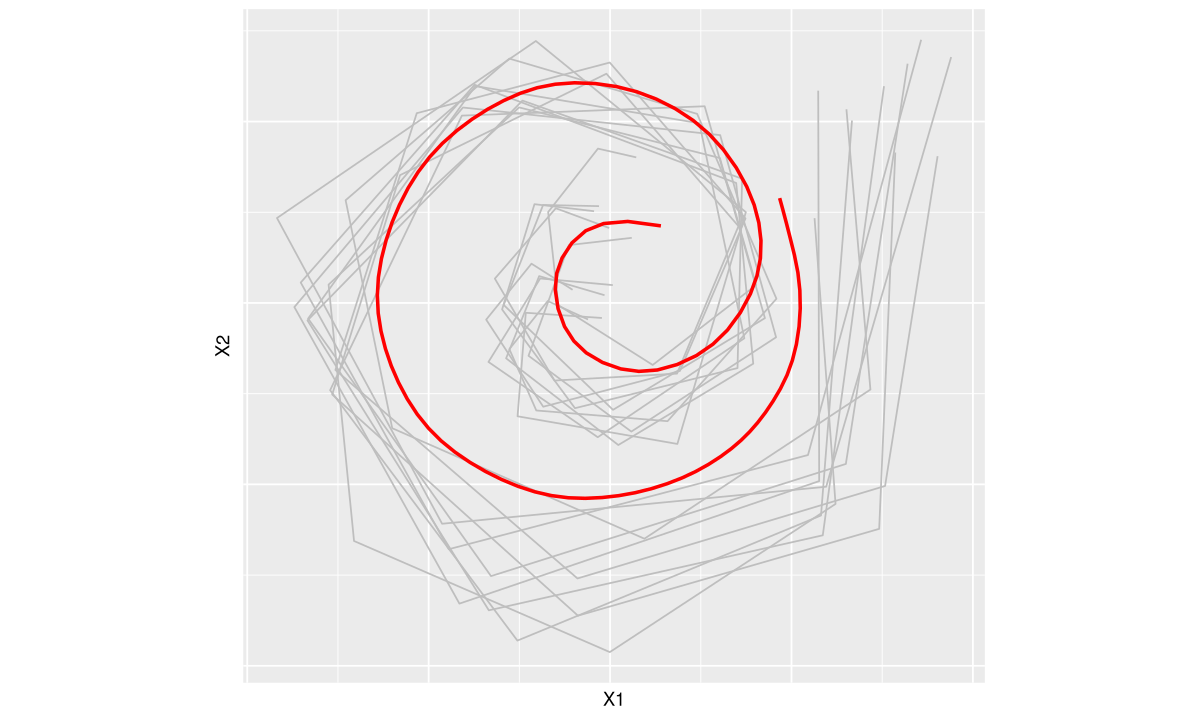

In [141]:
ggplot(bind_rows(mean.spirals.smooth$pfits, .id = "id"), aes(x=X1, y=X2)) +
    geom_path(aes(group=id), size=0.5, color="grey", show.legend=FALSE) +
    geom_path(data=get_evals(mean.spirals.smooth), aes(x=X1, y=X2), size=1, color="red") +
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

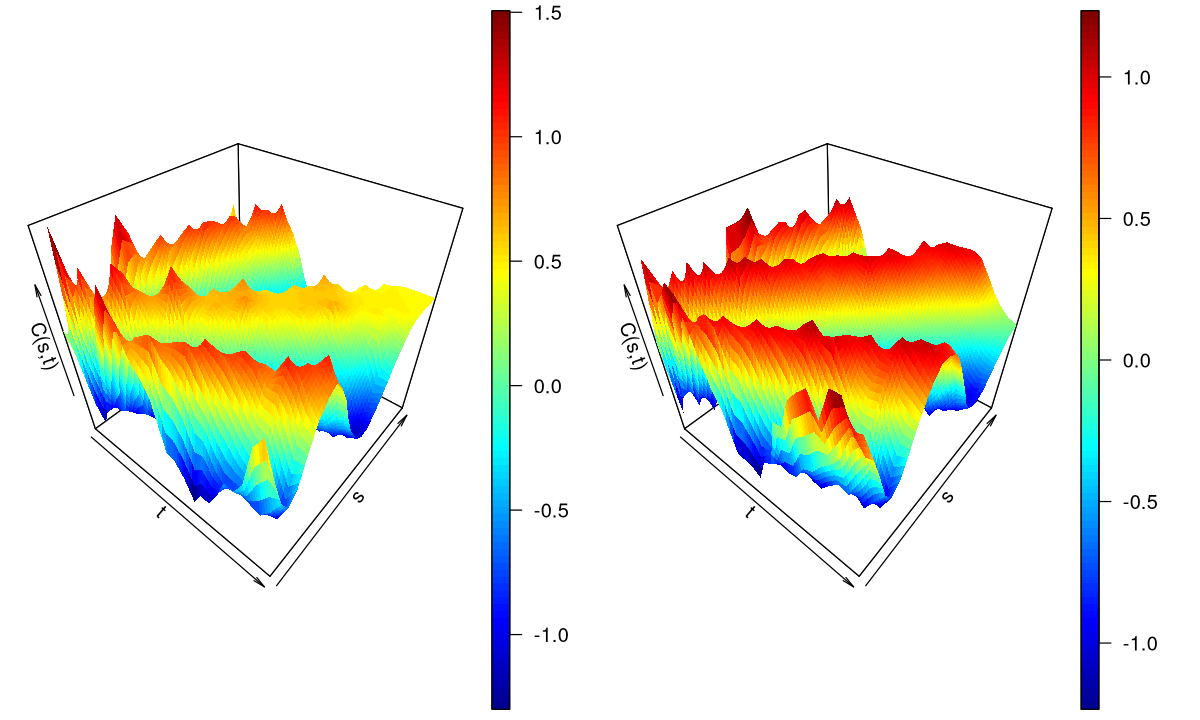

In [142]:
plot_cov_surface(mean.spirals.smooth$cov_fit)

## FIND OUTLIERS

In [ ]:
dists <- lapply(seq(1:length(data_curves2)), function(j){
    al <- align_curves(get_evals(smooth_elastic_mean2), smooth_elastic_mean2$procrustes_curves[[j]])
    al$elastic_dist
})

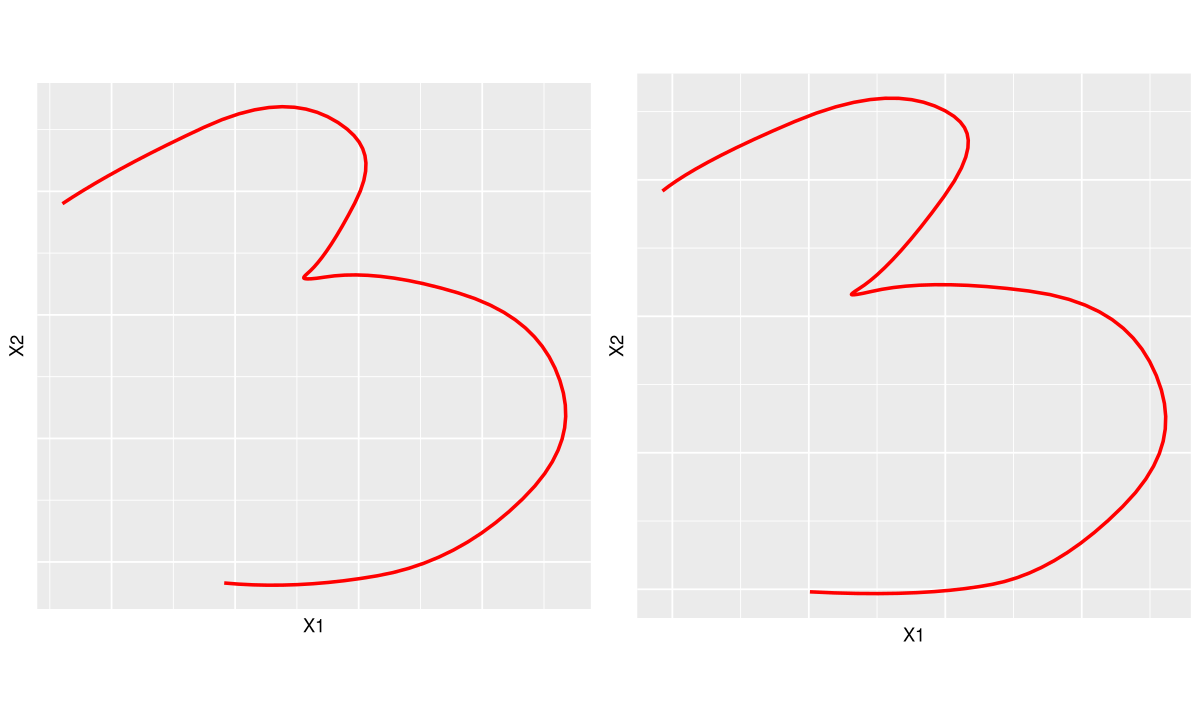

In [197]:
p1 <- ggplot() +
    geom_path(data=get_evals(mean2), aes(x=X1, y=X2), size=1, color="red") +
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

p2 <- ggplot() +
    geom_path(data=get_evals(mean.digits3), aes(x=X1, y=X2), size=1, color="red") +
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

grid.arrange(p1, p2, ncol=2)
ggsave("../presentation/images/results_digits3_warp.png", arrangeGrob(p1, p2,ncol=2), dpi=300, scale=0.6, width=8.5, height=4)

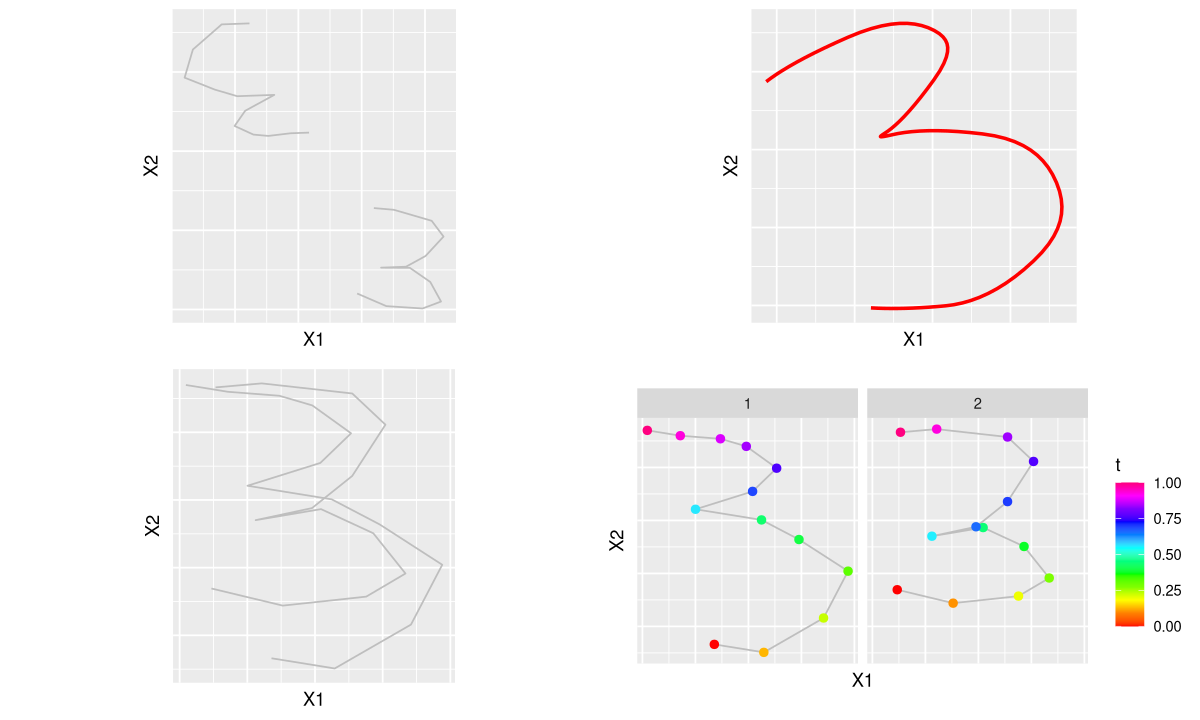

In [208]:
cids = c(2, 4, 13)
p1 <- ggplot(bind_rows(data_curves2[cids][-1], .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    coord_fixed() + 
   theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

p2 <- ggplot(mean.rot, aes(x=X1, y=X2)) + 
    geom_path(size=1, color="red") +
    coord_fixed() + 
   theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

p3 <- ggplot() + 
    geom_path(data=bind_rows(pfits[cids][-1], .id="id"), aes(x=X1, y=X2, group=id),size=0.5, color="grey") +
    coord_fixed() + 
   theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank())

p4 <- ggplot(bind_rows(pfits_warped[cids][-1], .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    geom_point(size=2, aes(x=X1, y=X2, group=id, col=t)) +
    scale_color_gradientn(colours = rainbow(12)) +  
    coord_fixed() +
    theme(axis.text.x=element_blank(),
         axis.ticks.x=element_blank(),
         axis.text.y=element_blank(),
         axis.ticks.y=element_blank()) +
    facet_wrap(~id)

grid.arrange(p1, p2, p3, p4, ncol=2)
ggsave("../presentation/images/basic_idea.png", arrangeGrob(p1, p2, ncol=2), dpi=300, scale=0.6, width=8.5, height=4)

ggsave("../presentation/images/basic1.png", p1, dpi=300, scale=0.6, width=4, height = 4)
ggsave("../presentation/images/basic2.png", p2, dpi=300, scale=0.6, width=4, height = 4)
ggsave("../presentation/images/basic3.png", p3, dpi=300, scale=0.6, width=3, height = 4)
ggsave("../presentation/images/basic4.png", p4, dpi=300, scale=0.6, width=5, height = 4)